# Approximating the value of $\pi$

In [2]:
import math
import random
from decimal import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# hundered number after the decimal point
getcontext().prec = 100
real_pi = 3.1415926535897932384626433832795028841971693993751058209749445923078164062862089986280348253421170679

## Gregory-Leibniz Series

In [10]:
# Using Gregory-Leibniz Series
pie = 0
for i in range(10**8):
    pie += 4 * (((-1)**i) / (2*i +1))
    if i%10**7 == 0:
        print('Value: ', '{:.10f}'.format(pie), 
              '| error: ', '{:.10f}'.format(abs(pie - real_pi)))

Value:  4.0000000000 | error:  0.8584073464
Value:  3.1415927536 | error:  0.0000001000
Value:  3.1415927036 | error:  0.0000000500
Value:  3.1415926869 | error:  0.0000000333
Value:  3.1415926786 | error:  0.0000000250
Value:  3.1415926736 | error:  0.0000000200
Value:  3.1415926703 | error:  0.0000000167
Value:  3.1415926679 | error:  0.0000000143
Value:  3.1415926661 | error:  0.0000000125
Value:  3.1415926647 | error:  0.0000000111


## Extracting $\pi$ from the circle

In [4]:
def estimate_pi(length, n):
    radius = float((length)/(math.sqrt(2-(2*(math.cos((math.radians(360)/n)))))))
    diameter = 2 * radius
    circ = length * n
    return(float(circ/diameter)) - real_pi

print('Error: ', estimate_pi(1, 10**7))

Error:  4.429057126653646e-05


## Throwing darts [Monte Carlo]

Pi is apprx:  3.6659201194475552


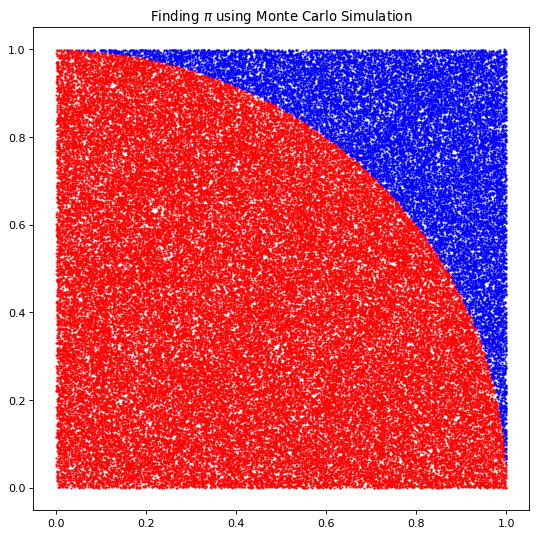

In [13]:
c, s = 0, 0
cx, cy, sx, sy = [], [], [], []
for i in range(10**5):
    x, y = np.random.uniform(0, 1), random.uniform(0, 1)
    if np.sqrt(x*x + y*y) <= 1:
        cx.append(x)
        cy.append(y)
        c += 1
    else:
        sx.append(x)
        sy.append(y)
        s += 1

print("Pi is apprx: ", c / s)
plt.figure(figsize=(8, 8), dpi=80)
plt.scatter(cx, cy, alpha=0.8, s=1, color = "red")
plt.scatter(sx, sy, alpha=0.8, s=1, color = "blue")
plt.title('Finding $\pi$ using Monte Carlo Simulation')
plt.show()

## Riemann $\zeta$ function

In [5]:
# The Riemann zeta function

s = 0
for i in range(1, 10**8):
    s += 1 / (i**2)
    if i%10**7 == 0:
        print('Value: ', '{:.10f}'.format(math.sqrt(6*s)), 
              '| error: ', '{:.10f}'.format(abs(math.sqrt(6*s) - real_pi)))

Value:  3.1415925581 | error:  0.0000000955
Value:  3.1415926058 | error:  0.0000000477
Value:  3.1415926217 | error:  0.0000000319
Value:  3.1415926297 | error:  0.0000000239
Value:  3.1415926344 | error:  0.0000000191
Value:  3.1415926376 | error:  0.0000000160
Value:  3.1415926397 | error:  0.0000000139
Value:  3.1415926418 | error:  0.0000000118
Value:  3.1415926439 | error:  0.0000000096


## Nilakantha Series

In [9]:
# Using Nilakantha Series 

pie, n = 3, 2
for _ in range(2, 10**8):
    pie += 4 / (n*(n+1)*(n+2)) - 4 / ((n+2)*(n+3)*(n+4))
    n += 4

print('Value: ', '{:.20f}'.format(pie), 
      '\nError: ', '{:.20f}'.format(abs(pie - real_pi)))

Value:  3.14159265358952533020 
Error:  0.00000000000026778579


In [8]:
# Holding the record 
# [https://coderwall.com/p/wyc4xq/calculate-pi-using-python]
''' The area of a polygon with many sides circumscribed
    inside a unit circle approaches pi'''

def calcSide(a):
    side = math.sqrt(2)
    H = math.sqrt(1/2)
    for x in range(1, a):
        b = side/2
        x = 1 - H
        side = math.sqrt(b**2 + x**2)
        H = math.sqrt(1-(side/2)**2)
    r = {"side":side,"H":H}
    return r

def calcPi(a):
    r = calcSide(a)
    side = r["side"]
    H = r["H"]
    pi = (side*H*(2**(a+1)))/2
    return pi

print('Value: ', '{:.20f}'.format(calcPi(500)), 
      '\nError: ', '{:.20f}'.format(abs(calcPi(500) - real_pi)))

Value:  3.14159265358979489235 
Error:  0.00000000000000177636


## Ramanujan's Pi Formula

In [13]:
# Ramanujan's Pi Formula
# This needs more elaboration

Pi = 9801 / (1103*sqrt(8))
print('First error: ', abs(Pi - real_pi),'\n')

# full formula
term = 0
for k in range(3):
    term += ( factorial(4*k) * (1103 + 26390 * k) )  / ( ((factorial(k))**4)  *  (396**(4*k)) )    
    print('Error: ', Decimal(1 / ((sqrt(8)/9801)*term) - real_pi))

First term error:  7.642351240733092e-08 

Error:  7.6423512407330917994841001927852630615234375E-8
Error:  4.44089209850062616169452667236328125E-16
Error:  0


## Archimedes’ Method

In [11]:
# Using Archimedes’ Method

pi = 0
PolySides = 6
SideLen = 1
Perim = 6
Dia = 2

while PolySides < 10**6:
    SideLen2 = Decimal(SideLen) / Decimal(2)
    radius_a = Decimal(((1**2) - (SideLen / 2)**2)).sqrt() 
    radius_b = Decimal(1) - Decimal(radius_a)
    SideLenNew = Decimal((radius_b**2) + (SideLen2**2)).sqrt()
    PolyCircum = Decimal(PolySides * SideLen)
    pi = PolyCircum / Dia
    SideLen = SideLenNew
    PolySides = 2 * PolySides
    
print('Value: ', '{:.20f}'.format(pi), 
      '\nError: ', '{:.20f}'.format(abs(pi - Decimal(real_pi))))

Value:  3.14159265358143766976 
Error:  0.00000000000835544624


# Pattern in the digits after the decimal point

Investigating the patterns in the numbers after the decimal point of pi
- Heatmap of the numbers and how often they occur
- Finding the probability of the next number

In [107]:
''' The value of Pi with a 50,000 digit after the decimal point
    [source: https://www.piday.org/million/] '''

Pi = str(14159265358979323846264338327950288419716939937510582097494459230781640628620899862803482534211706798214808651328230664709384460955058223172535940812848111745028410270193852110555964462294895493038196442881097566593344612847564823378678316527120190914564856692346034861045432664821339360726024914127372458700660631558817488152092096282925409171536436789259036001133053054882046652138414695194151160943305727036575959195309218611738193261179310511854807446237996274956735188575272489122793818301194912983367336244065664308602139494639522473719070217986094370277053921717629317675238467481846766940513200056812714526356082778577134275778960917363717872146844090122495343014654958537105079227968925892354201995611212902196086403441815981362977477130996051870721134999999837297804995105973173281609631859502445945534690830264252230825334468503526193118817101000313783875288658753320838142061717766914730359825349042875546873115956286388235378759375195778185778053217122680661300192787661119590921642019893809525720106548586327886593615338182796823030195203530185296899577362259941389124972177528347913151557485724245415069595082953311686172785588907509838175463746493931925506040092770167113900984882401285836160356370766010471018194295559619894676783744944825537977472684710404753464620804668425906949129331367702898915210475216205696602405803815019351125338243003558764024749647326391419927260426992279678235478163600934172164121992458631503028618297455570674983850549458858692699569092721079750930295532116534498720275596023648066549911988183479775356636980742654252786255181841757467289097777279380008164706001614524919217321721477235014144197356854816136115735255213347574184946843852332390739414333454776241686251898356948556209921922218427255025425688767179049460165346680498862723279178608578438382796797668145410095388378636095068006422512520511739298489608412848862694560424196528502221066118630674427862203919494504712371378696095636437191728746776465757396241389086583264599581339047802759009946576407895126946839835259570982582262052248940772671947826848260147699090264013639443745530506820349625245174939965143142980919065925093722169646151570985838741059788595977297549893016175392846813826868386894277415599185592524595395943104997252468084598727364469584865383673622262609912460805124388439045124413654976278079771569143599770012961608944169486855584840635342207222582848864815845602850601684273945226746767889525213852254995466672782398645659611635488623057745649803559363456817432411251507606947945109659609402522887971089314566913686722874894056010150330861792868092087476091782493858900971490967598526136554978189312978482168299894872265880485756401427047755513237964145152374623436454285844479526586782105114135473573952311342716610213596953623144295248493718711014576540359027993440374200731057853906219838744780847848968332144571386875194350643021845319104848100537061468067491927819119793995206141966342875444064374512371819217999839101591956181467514269123974894090718649423196156794520809514655022523160388193014209376213785595663893778708303906979207734672218256259966150142150306803844773454920260541466592520149744285073251866600213243408819071048633173464965145390579626856100550810665879699816357473638405257145910289706414011097120628043903975951567715770042033786993600723055876317635942187312514712053292819182618612586732157919841484882916447060957527069572209175671167229109816909152801735067127485832228718352093539657251210835791513698820914442100675103346711031412671113699086585163983150197016515116851714376576183515565088490998985998238734552833163550764791853589322618548963213293308985706420467525907091548141654985946163718027098199430992448895757128289059232332609729971208443357326548938239119325974636673058360414281388303203824903758985243744170291327656180937734440307074692112019130203303801976211011004492932151608424448596376698389522868478312355265821314495768572624334418930396864262434107732269780280731891544110104468232527162010526522721116603966655730925471105578537634668206531098965269186205647693125705863566201855810072936065987648611791045334885034611365768675324944166803962657978771855608455296541266540853061434443185867697514566140680070023787765913440171274947042056223053899456131407112700040785473326993908145466464588079727082668306343285878569830523580893306575740679545716377525420211495576158140025012622859413021647155097925923099079654737612551765675135751782966645477917450112996148903046399471329621073404375189573596145890193897131117904297828564750320319869151402870808599048010941214722131794764777262241425485454033215718530614228813758504306332175182979866223717215916077166925474873898665494945011465406284336639379003976926567214638530673609657120918076383271664162748888007869256029022847210403172118608204190004229661711963779213375751149595015660496318629472654736425230817703675159067350235072835405670403867435136222247715891504953098444893330963408780769325993978054193414473774418426312986080998886874132604721569516239658645730216315981931951673538129741677294786724229246543668009806769282382806899640048243540370141631496589794092432378969070697794223625082216889573837986230015937764716512289357860158816175578297352334460428151262720373431465319777741603199066554187639792933441952154134189948544473456738316249934191318148092777710386387734317720754565453220777092120190516609628049092636019759882816133231666365286193266863360627356763035447762803504507772355471058595487027908143562401451718062464362679456127531813407833033625423278394497538243720583531147711992606381334677687969597030983391307710987040859133746414428227726346594704745878477872019277152807317679077071572134447306057007334924369311383504931631284042512192565179806941135280131470130478164378851852909285452011658393419656213491434159562586586557055269049652098580338507224264829397285847831630577775606888764462482468579260395352773480304802900587607582510474709164396136267604492562742042083208566119062545433721315359584506877246029016187667952406163425225771954291629919306455377991403734043287526288896399587947572917464263574552540790914513571113694109119393251910760208252026187985318877058429725916778131496990090192116971737278476847268608490033770242429165130050051683233643503895170298939223345172201381280696501178440874519601212285993716231301711444846409038906449544400619869075485160263275052983491874078668088183385102283345085048608250393021332197155184306354550076682829493041377655279397517546139539846833936383047461199665385815384205685338621867252334028308711232827892125077126294632295639898989358211674562701021835646220134967151881909730381198004973407239610368540664319395097901906996395524530054505806855019567302292191393391856803449039820595510022635353619204199474553859381023439554495977837790237421617271117236434354394782218185286240851400666044332588856986705431547069657474585503323233421073015459405165537906866273337995851156257843229882737231989875714159578111963583300594087306812160287649628674460477464915995054973742562690104903778198683593814657412680492564879855614537234786733039046883834363465537949864192705638729317487233208376011230299113679386270894387993620162951541337142489283072201269014754668476535761647737946752004907571555278196536213239264061601363581559074220202031872776052772190055614842555187925303435139844253223415762336106425063904975008656271095359194658975141310348227693062474353632569160781547818115284366795706110861533150445212747392454494542368288606134084148637767009612071512491404302725386076482363414334623518975766452164137679690314950191085759844239198629164219399490723623464684411739403265918404437805133389452574239950829659122850855582157250310712570126683024029295252201187267675622041542051618416348475651699981161410100299607838690929160302884002691041407928862150784245167090870006992821206604183718065355672525325675328612910424877618258297651579598470356222629348600341587229805349896502262917487882027342092222453398562647669149055628425039127577102840279980663658254889264880254566101729670266407655904290994568150652653053718294127033693137851786090407086671149655834343476933857817113864558736781230145876871266034891390956200993936103102916161528813843790990423174733639480457593149314052976347574811935670911013775172100803155902485309066920376719220332290943346768514221447737939375170344366199104033751117354719185504644902636551281622882446257591633303910722538374218214088350865739177150968288747826569959957449066175834413752239709683408005355984917541738188399944697486762655165827658483588453142775687900290951702835297163445621296404352311760066510124120065975585127617858382920419748442360800719304576189323492292796501987518721272675079812554709589045563579212210333466974992356302549478024901141952123828153091140790738602515227429958180724716259166854513331239480494707911915326734302824418604142636395480004480026704962482017928964766975831832713142517029692348896276684403232609275249603579964692565049368183609003238092934595889706953653494060340216654437558900456328822505452556405644824651518754711962184439658253375438856909411303150952617937800297412076651479394259029896959469955657612186561967337862362561252163208628692221032748892186543648022967807057656151446320469279068212073883778142335628236089632080682224680122482611771858963814091839036736722208883215137556003727983940041529700287830766709444745601345564172543709069793961225714298946715435784687886144458123145935719849225284716050492212424701412147805734551050080190869960330276347870810817545011930714122339086639383395294257869050764310063835198343893415961318543475464955697810382930971646514384070070736041123735998434522516105070270562352660127648483084076118301305279320542746286540360367453286510570658748822569815793678976697422057505968344086973502014102067235850200724522563265134105592401902742162484391403599895353945909440704691209140938700126456001623742880210927645793106579229552498872758461012648369998922569596881592056001016552563756785667227966198857827948488558343975187445455129656344348039664205579829368043522027709842942325330225763418070394769941597915945300697521482933665556615678736400536665641654732170439035213295435291694145990416087532018683793702348886894791510716378529023452924407736594956305100742108714261349745956151384987137570471017879573104229690666702144986374645952808243694457897723300487647652413390759204340196340391147320233807150952220106825634274716460243354400515212669324934196739770415956837535551667302739007497297363549645332888698440611964961627734495182736955882207573551766515898551909866653935494810688732068599075407923424023009259007017319603622547564789406475483466477604114632339056513433068449539790709030234604614709616968868850140834704054607429586991382966824681857103188790652870366508324319744047718556789348230894310682870272280973624809399627060747264553992539944280811373694338872940630792615959954626246297070625948455690347119729964090894180595343932512362355081349490043642785271383159125689892951964272875739469142725343669415323610045373048819855170659412173524625895487301676002988659257866285612496655235338294287854253404830833070165372285635591525347844598183134112900199920598135220511733658564078264849427644113763938669248031183644536985891754426473998822846218449008777697763127957226726555625962825427653183001340709223343657791601280931794017185985999338492354956400570995585611349802524990669842330173503580440811685526531170995708994273287092584878944364600504108922669178352587078595129834417295351953788553457374260859029081765155780390594640873506123226112009373108048548526357228257682034160504846627750450031262008007998049254853469414697751649327095049346393824322271885159740547021482897111777923761225788734771881968254629812686858170507402725502633290449762778944236216741191862694396506715157795867564823993917604260176338704549901761436412046921823707648878341968968611815581587360629386038101712158552726683008238340465647588040513808016336388742163714064354955618689641122821407533026551004241048967835285882902436709048871181909094945331442182876618103100735477054981596807720094746961343609286148494178501718077930681085469000944589952794243981392135055864221964834915126390128038320010977386806628779239718014613432445726400973742570073592100315415089367930081699805365202760072774967458400283624053460372634165542590276018348403068113818551059797056640075094260878857357960373245141467867036880988060971642584975951380693094494015154222219432913021739125383559150310033303251117491569691745027149433151558854039221640972291011290355218157628232831823425483261119128009282525619020526301639114772473314857391077758744253876117465786711694147764214411112635835538713610110232679877564102468240322648346417663698066378576813492045302240819727856471983963087815432211669122464159117767322532643356861461865452226812688726844596844241610785401676814208088502800541436131462308210259417375623899420757136275167457318918945628352570441335437585753426986994725470316566139919996826282472706413362221789239031760854289437339356188916512504244040089527198378738648058472689546243882343751788520143956005710481194988423906061369573423155907967034614914344788636041031823507365027785908975782727313050488939890099239135033732508559826558670892426124294736701939077271307068691709264625484232407485503660801360466895118400936686095463250021458529309500009071510582362672932645373821049387249966993394246855164832611341461106802674466373343753407642940266829738652209357016263846485285149036293201991996882851718395366913452224447080459239660281715655156566611135982311225062890585491450971575539002439315351909021071194573002438801766150352708626025378817975194780610137150044899172100222013350131060163915415895780371177927752259787428919179155224171895853616805947412341933984202187456492564434623925319531351033114763949119950728584306583619353693296992898379149419394060857248639688369032655643642166442576079147108699843157337496488352927693282207629472823815374099615455987982598910937171262182830258481123890119682214294576675807186538065064870261338928229949725745303328389638184394477077940228435988341003583854238973542439564755568409522484455413923941000162076936368467764130178196593799715574685419463348937484391297423914336593604100352343777065888677811394986164787471407932638587386247328896456435987746676384794665040741118256583788784548581489629612739984134427260860618724554523606431537101127468097787044640947582803487697589483282412392929605829486191966709189580898332012103184303401284951162035342801441276172858302435598300320420245120728725355811958401491809692533950757784000674655260314461670508276827722235341911026341631571474061238504258459884199076112872580591139356896014316682831763235673254170734208173322304629879928049085140947903688786878949305469557030726190095020764334933591060245450864536289354568629585313153371838682656178622736371697577418302398600659148161640494496501173213138957470620884748023653710311508984279927544268532779743113951435741722197597993596852522857452637962896126915723579866205734083757668738842664059909935050008133754324546359675048442352848747014435454195762584735642161981340734685411176688311865448937769795665172796623267148103386439137518659467300244345005449953997423723287124948347060440634716063258306498297955101095418362350303094530973358344628394763047756450150085075789495489313939448992161255255977014368589435858775263796255970816776438001254365023714127834679261019955852247172201777237004178084194239487254068015560359983905489857235467456423905858502167190313952629445543913166313453089390620467843877850542393905247313620129476918749751910114723152893267725339181466073000890277689631148109022097245207591672970078505807171863810549679731001678708506942070922329080703832634534520380278609905569001341371823683709919495164896007550493412678764367463849020639640197666855923356546391383631857456981471962108410809618846054560390384553437291414465134749407848844237721751543342603066988317683310011331086904219390310801437843341513709243530136776310849135161564226984750743032971674696406665315270353254671126675224605511995818319637637076179919192035795820075956053023462677579439363074630569010801149427141009391369138107258137813578940055995001835425118417213605572752210352680373572652792241737360575112788721819084490061780138897107708229310027976659358387589093956881485602632243937265624727760378908144588378550197028437793624078250527048758164703245812908783952324532378960298416692254896497156069811921865849267704039564812781021799132174163058105545988013004845629976511212415363745150056350701278159267142413421033015661653560247338078430286552572227530499988370153487930080626018096238151613669033411113865385109193673938352293458883225508870645075394739520439680790670868064450969865488016828743437861264538158342807530618454859037982179945996811544197425363443996029025100158882721647450068207041937615845471231834600726293395505482395571372568402322682130124767945226448209102356477527230820810635188991526928891084555711266039650343978962782500161101532351605196559042118449499077899920073294769058685778787209829013529566139788848605097860859570177312981553149516814671769597609942100361835591387778176984587581044662839988060061622984861693533738657877359833616133841338536842119789389001852956919678045544828584837011709672125353387586215823101331038776682721157269495181795897546939926421979155233857662316762754757035469941489290413018638611943919628388705436777432242768091323654494853667680000010652624854730558615989991401707698385483188750142938908995068545307651168033373222651756622075269517914422528081651716677667279303548515420402381746089232839170327542575086765511785939500279338959205766827896776445318404041855401043513483895312013263783692835808271937831265496174599705674507183320650345566440344904536275600112501843356073612227659492783937064784264567633881880756561216896050416113903906396016202215368494109260538768871483798955999911209916464644119185682770045742434340216722764455893301277815868695250694993646101756850601671453543158148010545886056455013320375864548584032402987170934809105562116715468484778039447569798042631809917564228098739987669732376957370158080682290459921236616890259627304306793165311494017647376938735140933618332161428021497633991898354848756252987524238730775595559554651963944018218409984124898262367377146722606163364329640633572810707887581640438148501884114318859882769449011932129682715888413386943468285900666408063140777577257056307294004929403024204984165654797367054855804458657202276378404668233798528271057843197535417950113472736257740802134768260450228515797957976474670228409995616015691089038458245026792659420555039587922981852648007068376504183656209455543461351341525700659748819163413595567196496540321872716026485930490397874895890661272507948282769389535217536218507962977851461884327192232238101587444505286652380225328438913752738458923844225354726530981715784478342158223270206902872323300538621634798850946954720047952311201504329322662827276321779088400878614802214753765781058197022263097174950721272484794781695729614236585957820908307332335603484653187302930266596450137183754288975579714499246540386817992138934692447419850973346267933210726868707680626399193619650440995421676278409146698569257150743157407938053239252394775574415918458215625181921552337096074833292349210345146264374498055961033079941453477845746999921285999993996122816152193148887693880222810830019860165494165426169685867883726095877456761825072759929508931805218729246108676399589161458550583972742098090978172932393010676638682404011130402470073508578287246271349463685318154696904669686939254725194139929146524238577625500474852954768147954670070503479995888676950161249722820403039954632788306959762493615101024365553522306906129493885990157346610237122354789112925476961760050479749280607212680392269110277722610254414922157650450812067717357120271802429681062037765788371669091094180744878140490755178203856539099104775941413215432844062503018027571696508209642734841469572639788425600845312140659358090412711359200419759851362547961606322887361813673732445060792441176399759746193835845749159880976674470930065463424234606342374746660804317012600520559284936959414340814685298150539471789004518357551541252235905906872648786357525419112888773717663748602766063496035367947026923229718683277173932361920077745221262475186983349515101986426988784717193966497690708252174233656627259284406204302141137199227852699846988477023238238400556555178890876613601304770984386116870523105531491625172837327286760072481729876375698163354150746088386636406934704372066886512756882661497307886570156850169186474885416791545965072342877306998537139043002665307839877638503238182155355973235306860430106757608389086270498418885951380910304235957824951439885901131858358406674723702971497850841458530857813391562707603563907639473114554958322669457024941398316343323789759556808568362972538679132750555425244919435891284050452269538121791319145135009938463117740179715122837854601160359554028644059024964669307077690554810288502080858008781157738171917417760173307385547580060560143377432990127286772530431825197579167929699650414607066457125888346979796429316229655201687973000356463045793088403274807718115553309098870255052076804630346086581653948769519600440848206596737947316808641564565053004988161649057883115434548505266006982309315777650037807046612647060214575057932709620478256152471459189652236083966456241051955105223572397395128818164059785914279148165426328920042816091369377737222999833270820829699557377273756676155271139225880552018988762011416800546873655806334716037342917039079863965229613128017826797172898229360702880690877686605932527463784053976918480820410219447197138692560841624511239806201131845412447820501107987607171556831540788654390412108730324020106853419472304766667217498698685470767812051247367924791931508564447753798537997322344561227858432968466475133365736923872014647236794278700425032555899268843495928761240075587569464137056251400117971331662071537154360068764773186755871487839890810742953094106059694431584775397009439883949144323536685392099468796450665339857388878661476294434140104988899316005120767810358861166020296119363968213496075011164983278563531614516845769568710900299976984126326650234771672865737857908574664607722834154031144152941880478254387617707904300015669867767957609099669360755949651527363498118964130433116627747123388174060373174397054067031096767657486953587896700319258662594105105335843846560233917967492678447637084749783336555790073841914731988627135259546251816043422537299628632674968240580602964211463864368642247248872834341704415734824818333016405669596688667695634914163284264149745333499994800026699875888159350735781519588990053951208535103572613736403436753471410483601754648830040784641674521673719048310967671134434948192626811107399482506073949507350316901973185211955263563258433909982249862406703107683184466072912487475403161796994113973877658998685541703188477886759290260700432126661791922352093822787888098863359911608192353555704646349113208591897961327913197564909760001399623444553501434642686046449586247690943470482932941404111465409239883444351591332010773944111840741076849810663472410482393582740194493566516108846312567852977697346843030614624180358529331597345830384554103370109167677637427621021370135485445092630719011473184857492331816720721372793556795284439254815609137281284063330393735624200160456645574145881660521666087387480472433912129558777639069690370788285277538940524607584962315743691711317613478388271941686066257210368513215664780014767523103935786068961112599602818393095487090590738613519145918195102973278755710497290114871718971800469616977700179139196137914171627070189584692143436967629274591099400600849835684252019155937037010110497473394938778859894174330317853487076032219829705797511914405109942358830345463534923498268836240433272674155403016195056806541809394099820206099941402168909007082133072308966211977553066591881411915778362729274615618571037217247100952142369648308641025928874579993223749551912219519034244523075351338068568073544649951272031744871954039761073080602699062580760202927314552520780799141842906388443734996814582733720726639176702011830046481900024130835088465841521489912761065137415394356572113903285749187690944137020905170314877734616528798482353382972601361109845148418238081205409961252745808810994869722161285248974255555160763716750548961730168096138038119143611439921063800508321409876045993093248510251682944672606661381517457125597549535802399831469822036133808284993567055755247129027453977621404931820146580080215665360677655087838043041343105918046068008345911366408348874080057412725867047922583191274157390809143831384564241509408491339180968402511639919368532255573389669537490266209232613188558915808324555719484538756287861288590041060060737465014026278240273469625282171749415823317492396835301361786536737606421667781377399510065895288774276626368418306801908046098498094697636673356622829151323527888061577682781595886691802389403330764419124034120223163685778603572769415417788264352381319050280870185750470463129333537572853866058889045831114507739429352019943219711716422350056440429798920815943071670198574692738486538334361457946341759225738985880016980147574205429958012429581054565108310462972829375841611625325625165724980784920998979906200359365099347215829651741357984910471116607915874369865412223483418877229294463351786538567319625598520260729476740726167671455736498121056777168934849176607717052771876011999081441130586455779105256843048114402619384023224709392498029335507318458903553971330884461741079591625117148648744686112476054286734367090466784686702740918810142497111496578177242793470702166882956108777944050484375284433751088282647719785400065097040330218625561473321177711744133502816088403517814525419643203095760186946490886815452856213469883554445602495566684366029221951248309106053772019802183101032704178386654471812603971906884623708575180800353270471856594994761242481109992886791589690495639476246084240659309486215076903149870206735338483495508363660178487710608098042692471324100094640143736032656451845667924566695510015022983307984960799498824970617236744936122622296179081431141466094123415935930958540791390872083227335495720807571651718765994498569379562387555161757543809178052802946420044721539628074636021132942559160025707356281263873310600589106524570802447493754318414940148211999627645310680066311838237616396631809314446712986155275982014514102756006892975024630401735148919457636078935285550531733141645705049964438909363084387448478396168405184527328840323452024705685164657164771393237755172947951261323982296023945485797545865174587877133181387529598094121742273003522965080891777050682592488223221549380483714547816472139768209633205083056479204820859204754998573203888763916019952409189389455767687497308569559580106595265030362661597506622250840674288982659075106375635699682115109496697445805472886936310203678232501823237084597901115484720876182124778132663304120762165873129708112307581598212486398072124078688781145016558251361789030708608701989758898074566439551574153631931919810705753366337380382721527988493503974800158905194208797113080512339332219034662499171691509485414018710603546037946433790058909577211808044657439628061867178610171567409676620802957665770512912099079443046328929473061595104309022214393718495606340561893425130572682914657832933405246350289291754708725648426003496296116541382300773133272983050016025672401418515204189070115428857992081219844931569990591820118197335001261877280368124819958770702075324063612593134385955425477819611429351635612234966615226147353996740515849986035529533292457523888101362023476246690558164389678630976273655047243486430712184943734853006063876445662721866617012381277156213797461498613287441177145524447089971445228856629424402301847912054784985745216346964489738920624019435183100882834802492490854030778638751659113028739587870981007727182718745290139728366148421428717055317965430765045343246005363614726181809699769334862640774351999286863238350887566835950972655748154319401955768504372480010204137498318722596773871549583997184449072791419658459300839426370208756353982169620553248032122674989114026785285996734052420310917978999057188219493913207534317079800237365909853755202389116434671855829068537118979526262344924833924963424497146568465912489185566295893299090352392333336474352037077010108438800329075983421701855422838616172104176030116459187805393674474720599850235828918336929223373239994804371084196594731626548257480994825099918330069765693671596893644933488647442135008407006608835972350395323401795825570360169369909886711321097988970705172807558551912699306730992507040702455685077867906947661262980822516331363995211709845280926303759224267425755998928927837047444521893632034894155210445972618838003006776179313813991620580627016510244588692476492468919246121253102757313908404700071435613623169923716948481325542009145304103713545329662063921054798243921251725401323149027405858920632175894943454890684639931375709103463327141531622328055229729795380188016285907357295541627886764982741861642187898857410716490691918511628152854867941736389066538857642291583425006736124538491606741373401735727799563410433268835695078149313780073623541800706191802673285511919426760912210359874692411728374931261633950012395992405084543756985079570462226646190001035004901830341535458428337643781119885563187777925372011667185395418359844383052037628194407615941068207169703022851522505731260930468984234331527321313612165828080752126315477306044237747535059522871744026663891488171730864361113890694202790881431194487994171540421034121908470940802540239329429454938786402305129271190975135360009219711054120966831115163287054230284700731206580326264171161659576132723515666625366727189985341998952368848309993027574199164638414270779887088742292770538912271724863220288984251252872178260305009945108247835729056919885554678860794628053712270424665431921452817607414824038278358297193010178883456741678113989547504483393146896307633966572267270433932167454218245570625247972199786685427989779923395790575818906225254735822052364248507834071101449804787266919901864388229323053823185597328697809222535295910173414073348847610055640182423921926950620831838145469839236646136398910121021770959767049083050818547041946643713122996923588953849301363565761861060622287055994233716310212784574464639897381885667462608794820186474876727272220626764653380998019668836809941590757768526398651462533363124505364026105696055131838131742611844201890888531963569869627950367384243130113317533053298020166888174813429886815855778103432317530647849832106297184251843855344276201282345707169885305183261796411785796088881503296022907056144762209150947390359466469162353968092013945781758910889319921122600739281491694816152738427362642980982340632002440244958944561291670495082358124873917996486411334803247577752197089327722623494860150466526814398770516153170266969297049283162855042128981467061953319702695072143782304768752802873541261663917082459251700107141808548006369232594620190022780874098597719218051585321473926532515590354102092846659252999143537918253145452905984158176370589279069098969111643811878094353715213322614436253144901274547726957393934815469163116249288735747188240715039950094467319543161938554852076657388251396391635767231510055560372633948672082078086537349424401157996675073607111593513319591971209489647175530245313647709420946356969822266737752099451684506436238242118535348879893956731878066061078854400055082765703055874485418057788917192078814233511386629296671796434687600770479995378833878703487180218424373421122739402557176908196030920182401884270570460926225641783752652633583242406612533115294234579655695025068100183109004112453790153329661569705223792103257069370510908307894799990049993953221536227484766036136776979785673865846709366795885837887956259464648913766521995882869338018360119323685785585581955560421562508836502033220245137621582046181067051953306530606065010548871672453779428313388716313955969058320834168984760656071183471362181232462272588419902861420872849568796393254642853430753011052857138296437099903569488852851904029560473461311382638788975517885604249987483163828040468486189381895905420398898726506976202019955484126500053944282039301274816381585303964399254702016727593285743666616441109625663373054092195196751483287348089574777752783442210910731113518280460363471981856555729571447476825528578633493428584231187494400032296906977583159038580393535213588600796003420975473922967333106493956018122378128545843176055617338611267347807458506760630482294096530411183066710818930311088717281675195796753471885372293096161432040063813224658411111577583585811350185690478153689381377184728147519983505047812977185990847076219746058874232569958288925350419379582606162118423687685114183160683158679946016520577405294230536017803133572632670547903384012573059123396018801378254219270947673371919872873852480574212489211834708766296672072723256505651293331260595057777275424712416483128329820723617505746738701282095755443059683955556868611883971355220844528526400812520276655576774959696266126045652456840861392382657685833846984997787267065551918544686984694784957346226062942196245570853712727765230989554501930377321666491825781546772920052126671434632096378918523232150189761260343736840671941930377468809992968775824410478781232662531818459604538535438391144967753128642609252115376732588667226040425234910870269580996475958057946639734190640100363619040420331135793365424263035614570090112448008900208014780566037101541223288914657223931450760716706435568274377439657890679726874384730763464516775621030986040927170909512808630902973850445271828927496892121066700816485833955377359191369501531620189088874842107987068991148046692706509407620465027725286507289053285485614331608126930056937854178610969692025388650345771831766868859236814884752764984688219497397297077371871884004143231276365048145311228509900207424092558592529261030210673681543470152523487863516439762358604191941296976904052648323470099111542426012734380220893310966863678986949779940012601642276092608234930411806438291383473546797253992623387915829984864592717340592256207491053085315371829116816372193951887009577881815868504645076993439409874335144316263303172477474868979182092394808331439708406730840795893581089665647758599055637695252326536144247802308268118310377358870892406130313364773710116282146146616794040905186152603600925219472188909181073358719641421444786548995285823439470500798303885388608310357193060027711945580219119428999227223534587075662469261776631788551443502182870266856106650035310502163182060176092179846849368631612937279518730789726373537171502563787335797718081848784588665043358243770041477104149349274384575871071597315594394264125702709651251081155482479394035976811881172824721582501094960966253933953809221955919181885526780621499231727631632183398969380756168559117529984501320671293924041445938623988093812404521914848316462101473891825101090967738690664041589736104764365000680771056567184862814963711188321924456639458144914861655004956769826903089111856879869294705135248160917432430153836847072928989828460222373014526556798986277679680914697983782687643115988321090437156112997665215396354644208691975673700057387649784376862876817924974694384274652563163230055513041742273416464551278127845777724575203865437542828256714128858345444351325620544642410110379554641905811686230596447695870540721419852121067343324107567675758184569906930460475227701670056845439692340417110898889934163505851578873534308155208117720718803791040469830695786854739376564336319797868036718730796939242363214484503547763156702553900654231179201534649779290662415083288583952905426376876689688050333172278001858850697362324038947004718976193473443084374437599250341788079722358591342458131440498477017323616947197657153531977549971627856631190469126091825912498903676541769799036237552865263757337635269693443544004730671988689019681474287677908669796885225016369498567302175231325292653758964151714795595387842784998664563028788319620998304945198743963690706827626574858104391122326187940599415540632701319898957037611053236062986748037791537675115830432084987209202809297526498125691634250005229088726469252846661046653921714820801305022980526378364269597337070539227891535105688839381132497570713310295044303467159894487868471164383280506925077662745001220035262037094660234146489983902525888301486781621967751945831677187627572005054397944124599007711520515461993050983869825428464072555409274031325716326407929341833421470904125425335232480219322770753555467958716383587501815933871742360615511710131235256334858203651461418700492057043720182617331947157008675785393360786227395581857975872587441025420771054753612940474601000940954449596628814869159038990718659805636171376922272907641977551777201042764969496110562205925024202177042696221549587264539892276976603105249808557594716310758701332088614632664125911486338812202844406941694882615295776253250198703598706743804698219420563812558334364219492322759372212890564209430823525440841108645453694049692714940033197828613181861888111184082578659287574263844500599442295685864604810330153889114994869354360302218109434667640000223625505736312946262960961987605642599639461386923308371962659547392346241345977957485246478379807956931986508159776753505539189911513352522987361127791827485420086895396583594219633315028695611920122988898870060799927954111882690230789131076036176347794894320321027733594169086500719328040171638406449878717537567811853213284082165711075495282949749362146082155832056872321855740651610962748743750980922302116099826330339154694946444910045152809250897450748967603240907689836529406579201983152654106581368237919840906457124689484702093577611931399802468134052003947819498662026240089021501661638135383815150377350229660746279529103840686855690701575166241929872444827194293310048548244545807188976330032325258215812803274679620028147624318286221710543528983482082734516801861317195933247110746622285087106661177034653528395776259977446721857158161264111432717943478859908928084866949141390977167369002777585026866465405659503948678411107901161040085727445629384254941675946054871172359464291058509099502149587931121961359083158826206823321561530868337308381732793281969838750870834838804638847844188400318471269745437093732983624028751979208023218787448828728437273780178270080587824107493575148899789117397461293203510814327032514090304874622629423443275712600866425083331876886507564292716055252895449215376517514921963671810494353178583834538652556566406572513635750643532365089367904317025978781771903148679638408288102094614900797151377170990619549696400708676671023300486726314755105372317571143223174114116806228642063889062101923552235467116621374996932693217370431059872250394565749246169782609702533594750209138366737728944386964000281103440260847128990007468077648440887113413525033678773167977093727786821661178653442317322646378476978751443320953400016506921305464768909850502030150448808342618452087305309731894929164253229336124315143065782640702838984098416029503092418971209716016492656134134334222988279099217860426798124572853458013382609958771781131021673402565627440072968340661984806766158050216918337236803990279316064204368120799003162644491461902194582296909921227885539487835383056468648816555622943156731282743908264506116289428035016613366978240517701552196265227254558507386405852998303791803504328767038092521679075712040612375963276856748450791511473134400018325703449209097124358094479004624943134550289006806487042935340374360326258205357901183956490893543451013429696175452495739606214902887289327925206965353863964432253883275224996059869747598823299162635459733244451637553343774929289905811757863555556269374269109471170021654117182197505198317871371060510637955585889055688528879890847509157646390746936198815078146852621332524738376511929901561091897779220087057933964638274906806987691681974923656242260871541761004306089043779766785196618914041449252704808819714988015420577870065215940092897776013307568479669929554336561398477380603943688958876460549838714789684828053847017308711177611596635050399793438693391197898871091565417091330826076474063057114110988393880954814378284745288383680794188843426662220704387228874139478010177213922819119923654055163958934742639538248296090369002883593277458550608013179884071624465639979482757836501955142215513392819782269842786383916797150912624105487257009240700454884856929504481107380879965474815689139353809434745569721289198271770207666136024895814681191336141212587838955773571949863172108443989014239484966592517313881716026632619310653665350414730708044149391693632623737677770958503132559900957627319573086480424677012123270205337426670531424482081681303063973787366424836725398374876909806021827857862165127385635132901489035098832706172589325753639939790557291751600976154590447716922658063151110280384360173747421524760851520990161585823125715907334217365762671423904782795872815050956330928026684589376496497702329736413190609827406335310897924642421345837409011693919642504591288134034988106354008875968200544083643865166178805576089568967275315380819420773325979172784376256611843198910250074918290864751497940031607038455494653859460274524474668123146879434416109933389089926384118474252570445725174593257389895651857165759614812660203107976282541655905060424791140169579003383565748692528007430256234194982864679144763227740055294609039401775363356554719310001754300475047191448998410400158679461792416100164547165513370740739502604427695385538343975505488710997852054011751697475813449260794336895437832211724506873442319898788441285420647428097356258070669831069799352606933921356858813912148073547284632277849080870024677763036055512323866562951788537196730346347012229395816067925091532174890308408865160611190114984434123501246469280288059961342835118847154497712784733617662850621697787177438243625657117794500644777183702219991066950216567576440449979407650379999548450027106659878136038023141268369057831904607927652972776940436130230517870805465115424693952651271010529270703066730244471259739399505146284047674313637399782591845411764133279064606365841529270190302760173394748669603486949765417524293060407270050590395031485229213925755948450788679779252539317651564161971684435243697944473559642606333910551268260615957262170366985064732812667245219890605498802807828814297963366967441248059821921463395657457221022986775997467381260693670691340815594120161159601902377535255563006062479832612498812881929373434768626892192397778339107331065882568137771723283153290825250927330478507249771394483338925520811756084529665905539409655685417060011798572938139982583192936791003918440992865756059935989100029698644609747147184701015312837626311467742091455740418159088000649432378558393085308283054760767995243573916312218860575496738322431956506554608528812019023636447127037486344217272578795034284863129449163184753475314350413920961087960577309872013524840750576371992536504709085825139368634638633680428917671076021111598288755399401200760139470336617937153963061398636554922137415979051190835882900976566473007338793146789131814651093167615758213514248604422924453041131606527009743300884990346754055186406773426035834096086055337473627609356588531097609942383473822220872924644976845605795625167655740884103217313456277358560523582363895320385340248422733716391239732159954408284216666360232965456947035771848734420342277066538373875061692127680157661810954200977083636043611105924091178895403380214265239489296864398089261146354145715351943428507213534530183158756282757338982688985235577992957276452293915674775666760510878876484534936360682780505646228135988858792599409464460417052044700463151379754317371877560398159626475014109066588661621800382669899619655805872086397211769952194667898570117983324406018115756580742841829106151939176300591943144346051540477105700543390001824531177337189558576036071828605063564799790041397618089553636696031621931132502238517916720551806592635180362512145759262383693482226658955769946604919381124866090997981285718234940066155521961122072030922776462009993152442735894887105766238946938894464950939603304543408421024624010487233287500817491798755438793873814398942380117627008371960530943839400637561164585609431295175977139353960743227924892212670458081833137641658182695621058728924477400359470092686626596514220506300785920024882918608397437323538490839643261470005324235406470420894992102504047267810590836440074663800208701266642094571817029467522785400745085523777208905816839184465928294170182882330149715542352359117748186285929676050482038643431087795628929254056389466219482687110428281638939757117577869154301650586029652174595819888786804081103284327398671986213062055598552660364050462821523061545944744899088390819997387474529698107762014871340001225355222466954093152131153379157980269795557105085074738747507580687653764457825244326380461430428892359348529610582693821034980004052484070844035611678171705128133788057056434506161193304244407982603779511985486945591520519600930412710072778493015550388953603382619293437970818743209499141595933963681106275572952780042548630600545238391510689989135788200194117865356821491185282078521301255185184937115034221595422445119002073935396274002081104655302079328672547405436527175958935007163360763216147258154076420530200453401835723382926619153083540951202263291650544261236191970516138393573266937601569144299449437448568097756963031295887191611292946818849363386473927476012269641588489009657170861605981472044674286642087653347998582220906198021732116142304194777549907387385679411898246609130916917722742072333676350326783405863019301932429963972044451792881228544782119535308989101253429755247276357302262813820918074397486714535907786335301608215599113141442050914472935350222308171936635093468658586563148555758624478186201087118897606529698992693281787055764351433820601410773292610634315253371822433852635202177354407152818981376987551575745469397271504884697936195004777209705617939138289898453274262272886471088832701737232588182446584362495805925603381052156062061557132991560848920643403033952622634514542836786982880742514225674518061841495646861116354049718976821542277224794740335715274368194098920501136534001238467142965518673441537416150425632567134302476551252192180357801692403266995417460875924092070046693403965101781348578356944407604702325407555577647284507518268904182939661133101601311190773986324627782190236506603740416067249624901374332172464540974129955705291424382080760983648234659738866913499197840131080155813439791948528304367390124820824448141280954437738983200598649091595053228579145768849625786658859991798675205545580990045564611787552493701245532171701942828846174027366499784755082942280202329012216301023097721515694464279098021908266898688342630716092079140851976952355534886577434252775311972474308730436195113961190800302558783876442060850447306312992778889427291897271698905759252446796601897074829609491906487646937027507738664323919190422542902353189233772931667360869962280325571853089192844038050710300647768478632431910002239297852553723755662136447400967605394398382357646069924652600890906241059042154539279044115295803453345002562441010063595300395988644661695956263518780606885137234627079973272331346939714562855426154676506324656766202792452085813477176085216913409465203076733918411475041401689241213198268815686645614853802875393311602322925556189410429953356400957864953409351152664540244187759493169305604486864208627572011723195264050230997745676478384889734643172159806267876718380052476968840849891850861490034324034767426862459523958903585821350064509981782446360873177543788596776729195261112138591947254514003011805034378752776644027626189410175768726804281766238606804778852428874302591452470739505465251353394595987896197789110418902929438185672050709646062635417329446495766126519534957018600154126239622864138977967333290705673769621564981845068422636903678495559700260798679962610190393312637685569687670292953711625280055431007864087289392257145124811357786276649024251619902774710903359333093049483805978566288447874414698414990671237647895822632949046798120899848571635710878311918486302545016209298058292083348136384054217200561219893536693713367333924644161252231969434712064173754912163570085736943973059797097197266666422674311177621764030686813103518991122713397240368870009968629225464650063852886203938005047782769128356033725482557939129852515068299691077542576474883253414121328006267170940090982235296579579978030182824284902214707481111240186076134151503875698309186527806588966823625239378452726345304204188025084423631903833183845505223679923577529291069250432614469501098610888999146585518818735825281643025209392852580779697376208456374821144339881627100317031513344023095263519295886806908213558536801610002137408511544849126858412686958991741491338205784928006982551957402018181056412972508360703568510553317878408290000415525118657794539633175385320921497205266078312602819611648580986845875251299974040927976831766399146553861089375879522149717317281315179329044311218158710235187407572221001237687219447472093493123241070650806185623725267325407333248757544829675734500193219021991199607979893733836732425761039389853492787774739805080800155447640610535222023254094435677187945654304067358964910176107759483645408234861302547184764851895758366743997915085128580206078205544629917232020282229148869593997299742974711553718589242384938558585954074381048826246487880533042714630119415898963287926783273224561038521970111304665871005000832851773117764897352309266612345888731028835156264460236719966445547276083101187883891511493409393447500730258558147561908813987523578123313422798665035227253671712307568610450045489703600795698276263923441071465848957802414081584052295369374997106655948944592462866199635563506526234053394391421112718106910522900246574236041)
print(len(Pi))

50000


In [108]:
count = 0
for i in range(10):
    count += Pi.count(str(i))
    print('Count for', i,': ', Pi.count(str(i)))
    
print('\n',count)

Count for 0 :  5033
Count for 1 :  5055
Count for 2 :  4867
Count for 3 :  4947
Count for 4 :  5011
Count for 5 :  5052
Count for 6 :  5018
Count for 7 :  4977
Count for 8 :  5030
Count for 9 :  5010

 50000


[11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71, 73, 79, 83, 89, 97]


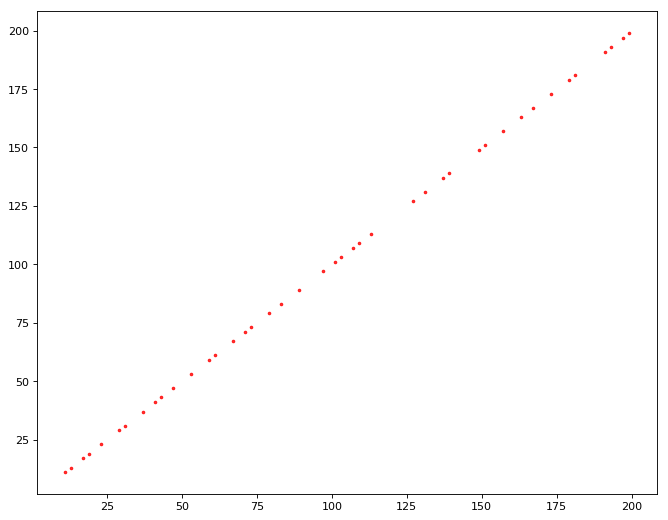

In [5]:
# Prime numbers and the relation to Pi

def prime(lower, upper):
    primes = []
    for num in range(lower,upper + 1):
   # prime numbers are greater than 1
        if num > 1:
            for i in range(2,num):
                if (num % i) == 0:
                    break
            else:
                primes.append(num)
    return primes

print(prime(10, 100))

L = [_ for _ in range(200)]
primes = prime(10, 200)


plt.figure(figsize=(10, 8), dpi=80)
plt.scatter(primes, primes, alpha=0.8, s=5, color = "red")
plt.show()

Prime number generation demo


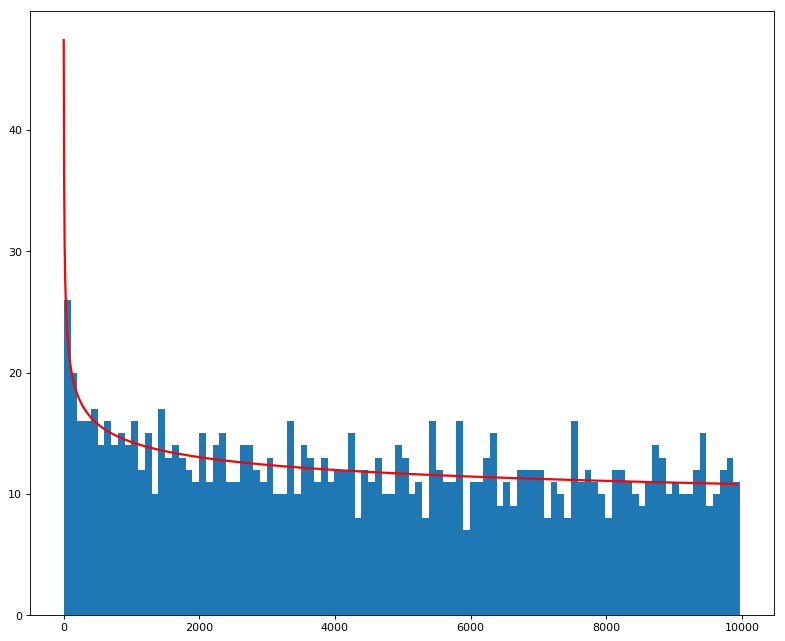

In [4]:
import scipy, pylab

def isEven(n):
    return n%2==0

def isPrime(n):
    Dmax = scipy.sqrt(n)
    if n == 2:
        return True
    if isEven(n):
        return False
    d = 3
    while n%d != 0 and d <= Dmax:
        d += 2
    return d > Dmax

def primeList(nMax):
    return [n for n in scipy.arange(2,nMax) if isPrime(n)]

def PlotPrimeDensity(primes, bins=100):
    pylab.hist(primes, bins=bins)
    pylab.show()

def nthPrimeTheory(n):
    return n * (scipy.log(n) + scipy.log(scipy.log(n)) - 1.)

def PrimeDensityTheory(n):
    return 1./(scipy.log(n) + scipy.log(scipy.log(n)) + 1./scipy.log(n))

def PlotPrimeDensityTheory(primes, bins=100, nPoints=1000):
    plt.figure(figsize=(12, 10), dpi=80)
    pylab.hist(primes, bins=bins)
    nMax = len(primes)
    n = scipy.arange(3,nMax,nMax/nPoints)
    p = nthPrimeTheory(n)
    rho = PrimeDensityTheory(n)
    C = (primes[-1]-primes[0])/bins
    pylab.plot(p, rho*C, color='r', linewidth=2)
    pylab.show()

def demo():
    print ("Prime number generation demo")
    primes = primeList(10000)
    PlotPrimeDensityTheory(primes)

if __name__ == '__main__':
    demo()